<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h1>AdaBoost Classifier</h1>
    <h2><a href = 'https://www.linkedin.com/in/ahmedsharaf9/' style = "text-decoration: none; color: #F5EDED">Ahmed Sharaf</a></h2>
</div>   </ul>
</div>

<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h2>Import Libraries</h2>
</div>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h2>Import Data</h2>
</div>

In [4]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h2>Feature Engineering</h2>
</div>

In [5]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [6]:
df['Gender'] = df['Gender'].str.replace('Fe Male', 'Female')

In [7]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [8]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [9]:
df['MaritalStatus'] = df['MaritalStatus'].str.replace('Single', 'Unmarried')
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [10]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [11]:
# Checking Missing Values
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum() >= 1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean() * 100, 5), '% Missing Values') # Precentage Of Missing Values

Age 4.62357 % Missing Values
TypeofContact 0.51146 % Missing Values
DurationOfPitch 5.13502 % Missing Values
NumberOfFollowups 0.92062 % Missing Values
PreferredPropertyStar 0.53191 % Missing Values
NumberOfTrips 2.86416 % Missing Values
NumberOfChildrenVisiting 1.35025 % Missing Values
MonthlyIncome 4.76678 % Missing Values


In [12]:
# Statistics on numerical columns (null cols)
df[features_with_na].select_dtypes(exclude = 'object').describe() # exclude -> means don't contain object columns (استبعاد)

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [13]:
# Age 
df['Age'].fillna(df['Age'].median(), inplace= True)

# TypeofContact
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0], inplace= True)

# DurationOfPitch
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(), inplace= True)

# NumberOfFollowups
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0], inplace= True)

# PreferredPropertyStar
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0], inplace= True)

# NumberOfTrips
df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(), inplace = True)

# NumberOfChildrenVisiting
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0], inplace= True)

# MonthlyIncome
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace= True)

In [14]:
df.drop('CustomerID', inplace=True, axis = 1)

In [15]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [16]:
# Feature Extraction 
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [17]:
# Create new Column For Feature
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], inplace=True)

In [18]:
# get all the numeric features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(f'Num Of Numberical Fearures : {len(numerical_features)}')

Num Of Numberical Fearures : 12


In [19]:
# get Categorical Features
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f'Num Of Categorical Fearures : {len(categorical_features)}')

Num Of Categorical Fearures : 6


In [20]:
# get Discrete Features  (Discrete Is Numerical Feature but in normal is categorical feature contain more than one category)
dicrete_features = [feature for feature in numerical_features if len(df[feature].unique()) <= 25]
print(f'Num Of Discrete Fearures : {len(dicrete_features)}')

Num Of Discrete Fearures : 9


In [21]:
# get Continus Features
continus_features = [feature for feature in numerical_features if feature not in dicrete_features]
print(f'Num Of Continus Fearures : {len(continus_features)}')

Num Of Continus Fearures : 3


In [22]:
# lets train test split 
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'], axis = 1)
y = df['ProdTaken']
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [23]:
# Seprate Data To Train, Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [24]:
# Create Column Transformation
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numerical_trassform = StandardScaler()
ohe_trassform = OneHotEncoder(drop = 'first')

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', ohe_trassform, cat_features),
        ('StandardScaler', numerical_trassform, num_features)
    ]
)

In [25]:
X_train = preprocessor.fit_transform(X_train)

In [26]:
X_test = preprocessor.transform(X_test)

<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h2>Build Model</h2>
</div>

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [28]:
# Try Different Model In Efficient Way
models = {
    'LogisticRegression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

for i in range(len(list(models))):
    # get model
    model = list(models.values())[i]
    
    # fit model
    model.fit(X_train, y_train)
    
    # predict 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    # print Information About Modek
    print(list(models.keys())[i])
    print()
    print('Model Performance For Training Set')
    print('- Accuracy: {:0.4f}'.format(model_train_accuracy))
    print('- F1 Score: {:0.4f}'.format(model_train_f1))
    print('- Precision: {:0.4f}'.format(model_train_precision))
    print('- Recall: {:0.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:0.4f}'.format(model_train_rocauc_score))

    print('-' * 40)

    print('Model Performance For Test Set')
    print('- Accuracy: {:0.4f}'.format(model_test_accuracy))
    print('- F1 Score: {:0.4f}'.format(model_test_f1))
    print('- Precision: {:0.4f}'.format(model_test_precision))
    print('- Recall: {:0.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:0.4f}'.format(model_test_rocauc_score))

    print('='*40)
    print()

LogisticRegression

Model Performance For Training Set
- Accuracy: 0.8460
- F1 Score: 0.8202
- Precision: 0.7016
- Recall: 0.3032
- Roc Auc Score: 0.6368
----------------------------------------
Model Performance For Test Set
- Accuracy: 0.8364
- F1 Score: 0.8087
- Precision: 0.6914
- Recall: 0.2932
- Roc Auc Score: 0.6307

Decision Tree

Model Performance For Training Set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------------
Model Performance For Test Set
- Accuracy: 0.9110
- F1 Score: 0.9110
- Precision: 0.7737
- Recall: 0.7696
- Roc Auc Score: 0.8575

Random Forest

Model Performance For Training Set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------------
Model Performance For Test Set
- Accuracy: 0.9294
- F1 Score: 0.9238
- Precision: 0.9766
- Recall: 0.6545
- Roc Auc Score: 0.8253

GradientBoosting

Model Performa

In [29]:
# We Select Radnom Forest, AdaBoost Lets Try Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'max_depth': [5, 8, 15, None, 10],
    'max_features': [5, 7, 'auto', 8],
    'min_samples_split': [2, 8, 15, 20],
    'n_estimators': [100, 200, 500, 1000]
}

adaboost_params = {
    'n_estimators': [50, 60, 70 , 80, 90],
    'algorithm': ['SAMME', 'SAMME.R']
}

randomcv_models = [
    ('RF', RandomForestClassifier(), rf_params),
    ('AdaBoost', AdaBoostClassifier(), adaboost_params)
]

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model, 
                               param_distributions=params,
                               n_iter=100, 
                               cv = 3,
                               verbose=2,
                               n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f'------------------ Best Params For {model_name} ------------------')
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
------------------ Best Params For RF ------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 15}
------------------ Best Params For AdaBoost ------------------
{'n_estimators': 80, 'algorithm': 'SAMME'}


In [30]:
# now we can train model using best param
models = {
    'Random Forest': RandomForestClassifier(n_estimators=200, min_samples_split=2, max_features=8, max_depth=15),
    'AdaBoost': AdaBoostClassifier(n_estimators = 80, algorithm = 'SAMME')
}

for i in range(len(list(models))):
    # get model
    model = list(models.values())[i]
    
    # fit model
    model.fit(X_train, y_train)
    
    # predict 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    # print Information About Modek
    print(list(models.keys())[i])
    print()
    print('Model Performance For Training Set')
    print('- Accuracy: {:0.4f}'.format(model_train_accuracy))
    print('- F1 Score: {:0.4f}'.format(model_train_f1))
    print('- Precision: {:0.4f}'.format(model_train_precision))
    print('- Recall: {:0.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:0.4f}'.format(model_train_rocauc_score))

    print('-' * 40)

    print('Model Performance For Test Set')
    print('- Accuracy: {:0.4f}'.format(model_test_accuracy))
    print('- F1 Score: {:0.4f}'.format(model_test_f1))
    print('- Precision: {:0.4f}'.format(model_test_precision))
    print('- Recall: {:0.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:0.4f}'.format(model_test_rocauc_score))

    print('='*40)
    print()

Random Forest

Model Performance For Training Set
- Accuracy: 0.9982
- F1 Score: 0.9982
- Precision: 1.0000
- Recall: 0.9904
- Roc Auc Score: 0.9952
----------------------------------------
Model Performance For Test Set
- Accuracy: 0.9356
- F1 Score: 0.9314
- Precision: 0.9638
- Recall: 0.6963
- Roc Auc Score: 0.8450

AdaBoost

Model Performance For Training Set
- Accuracy: 0.8465
- F1 Score: 0.8132
- Precision: 0.7699
- Recall: 0.2524
- Roc Auc Score: 0.6176
----------------------------------------
Model Performance For Test Set
- Accuracy: 0.8364
- F1 Score: 0.7977
- Precision: 0.7818
- Recall: 0.2251
- Roc Auc Score: 0.6049



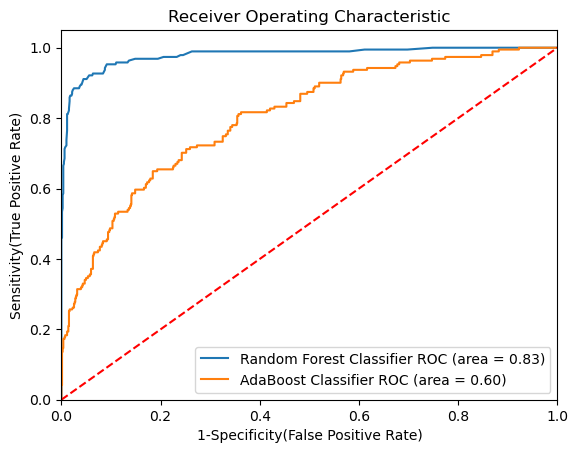

In [31]:
# lets plot roc auc curve 
auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(n_estimators=200, min_samples_split=2, max_features=7, max_depth=None),
        'auc': 0.8319
    },
    
     {
        'label': 'AdaBoost Classifier',
        'model': AdaBoostClassifier(n_estimators = 80, algorithm = 'SAMME'),
        'auc': 0.6049
    }
]

for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train thme model

    # Compute False postive rate, and True positive rate
    fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    # Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 